In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.interpolate import interp1d
import helper

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:165: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:186: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


In [13]:
root="~/scratch/detailed_save"

# Load GRN

# Parameters
rule = 154
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness
seed_ints = [69904,149796]
try_seedints = [69904,149796,1024, 4147842,1238860,2481300]

#Targets
all_targs=[]
for s in try_seedints:
    random_grns=np.random.randn(5, grn_size+2, grn_size).astype(np.float64)
    targets, phenos, fitnesses = helper.get_pop_TPF(random_grns, len(random_grns), num_cells, grn_size, dev_steps, geneid, rule, s, s)
    all_targs.append(targets)

#Check GRNs from the last generation
varied_phenos, varied_fits, varied_genos = helper.try_grn(True, rule, seed_ints, try_seedints, grn_size, geneid, root, num_cells, dev_steps)
env1_phenos, env1_fits, env1_genos = helper.try_grn(False, rule, seed_ints[0], try_seedints, grn_size, geneid, root, num_cells, dev_steps)
env2_phenos, env2_fits, env2_genos = helper.try_grn(False, rule, seed_ints[1], try_seedints, grn_size, geneid, root, num_cells, dev_steps)

varied_df = pd.DataFrame(varied_fits.T, columns = try_seedints)
env1_df = pd.DataFrame(env1_fits.T, columns = try_seedints)
env2_df = pd.DataFrame(env2_fits.T, columns = try_seedints)
dfs=[varied_df, env1_df, env2_df]

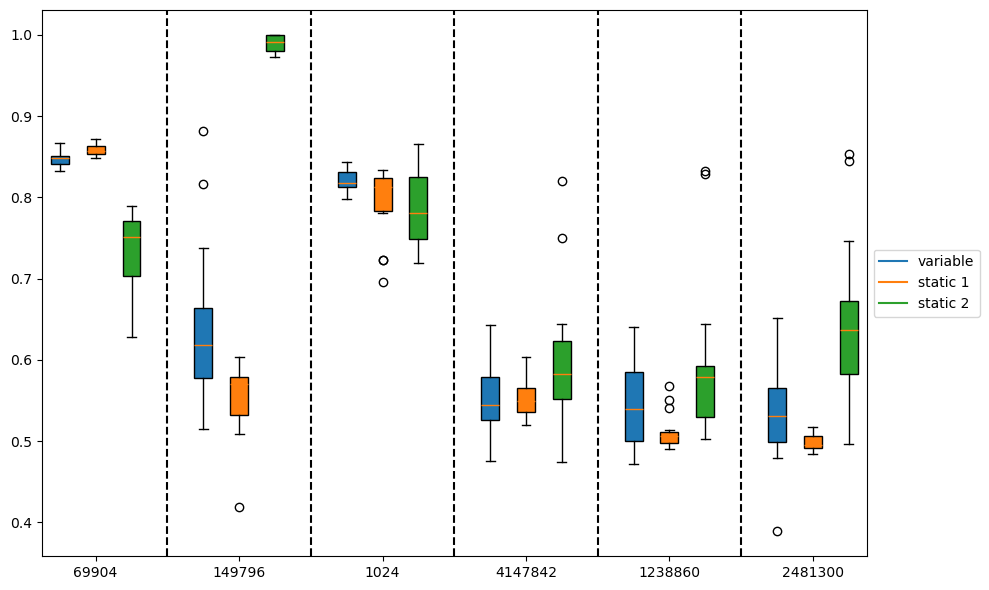

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['C0', 'C1', 'C2']
# Loop through each DataFrame and plot the boxplots
for i, df in enumerate(dfs):
    # Plot the boxplot, with positions offset for each dataframe
    bp = ax.boxplot(df.values, positions=np.arange(df.shape[1]) * (len(dfs) + 1) + i, patch_artist=True)
    # Set the box colors
    for box in bp['boxes']:
        box.set(facecolor=colors[i])
ax.set_xticks(np.arange(varied_df.shape[1]) * (len(dfs) + 1) + 1)
ax.set_xticklabels(varied_df.columns)

# Create legend for the colors
labels=["variable", "static 1", "static 2"]
for i, color in enumerate(colors):
    ax.plot([], c=color, label=labels[i])

# Add legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i in range(1, varied_df.shape[1]):
    # Position the line between each set
    x_position = i * (len(dfs) + 1) - 1
    ax.axvline(x=x_position, color='black', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
dfs[2]

,69904,149796,1024,4147842,1238860,2481300
0,0.762397,1.000000,0.787190,0.582644,0.582645,0.665289
1,0.776206,0.991686,0.824285,0.644604,0.601019,0.745847
2,0.627824,0.973098,0.768006,0.548816,0.584372,0.640418
3,0.707141,0.973661,0.778312,0.555329,0.523702,0.569582
4,0.700058,0.981381,0.735544,0.608782,0.580807,0.670054
5,0.696590,0.999931,0.719274,0.473915,0.557101,0.555278
6,0.787190,1.000000,0.865702,0.592975,0.561983,0.595041
7,0.753595,0.979685,0.781209,0.604468,0.643810,0.675002
8,0.714870,0.991728,0.745856,0.506202,0.578496,0.599144
9,0.723140,0.991736,0.752066,0.750000,0.832645,0.845041


Text(0, 0.5, 'Unseen')

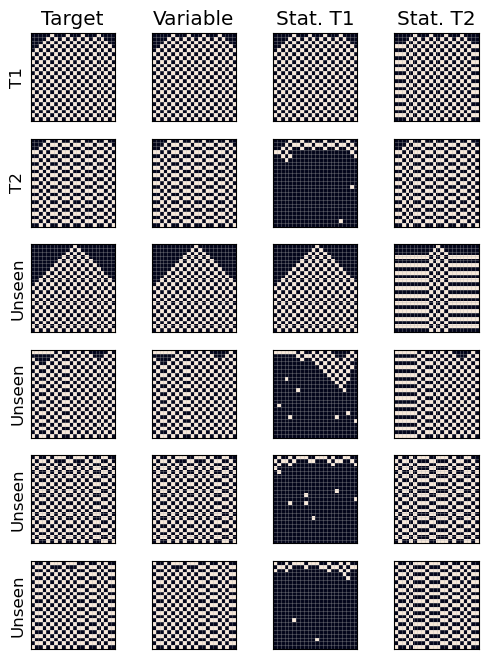

In [11]:
fig, axs = plt.subplots(6, 4, figsize=(6, 8), sharex=True, sharey=True)

plt.rcParams.update({"font.size": 12})

rep_id=10 #8 for 94, 2 for 102, 12 for 70, 10 for 54, 10 for 50, 12 for 62

for i in range(6):#looping through seeds
    helper.imshow_ca(all_targs[i], ax=axs[i,0])
    helper.imshow_ca(varied_phenos[i,rep_id,:,:], ax=axs[i,1])
    helper.imshow_ca(env1_phenos[i,rep_id,:,:], ax=axs[i,2])
    helper.imshow_ca(env2_phenos[i,rep_id,:,:], ax=axs[i,3])

axs[0,0].set_title('Target')
axs[0,1].set_title('Variable')
axs[0,2].set_title('Stat. T1')
axs[0,3].set_title('Stat. T2')

axs[0,0].set_ylabel("T1")
axs[1,0].set_ylabel("T2")
axs[2,0].set_ylabel("Unseen")
axs[3,0].set_ylabel("Unseen")
axs[4,0].set_ylabel("Unseen")
axs[5,0].set_ylabel("Unseen")

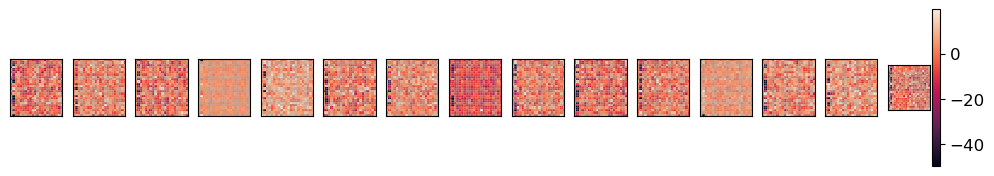

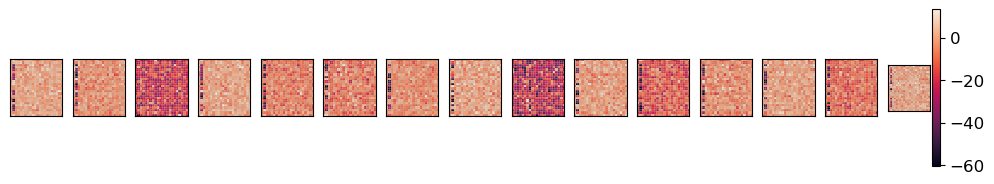

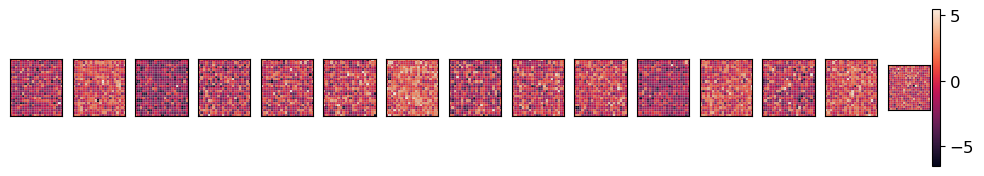

In [ ]:
fig, axs = plt.subplots(ncols=15, nrows = 1, figsize=(12, 4))
for i,g in enumerate(varied_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(varied_genos)-1:
        fig.colorbar(im, ax=axs[-1])

fig, axs = plt.subplots(ncols=15, nrows = 1, figsize=(12, 4))
for i,g in enumerate(env1_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(env1_genos)-1:
        fig.colorbar(im, ax=axs[-1])

fig, axs = plt.subplots(ncols=15, nrows = 1, figsize=(12, 4))
for i,g in enumerate(env2_genos):
    im = helper.imshow_ca(g, ax=axs[i])
    if i == len(env2_genos)-1:
        fig.colorbar(im, ax=axs[-1])

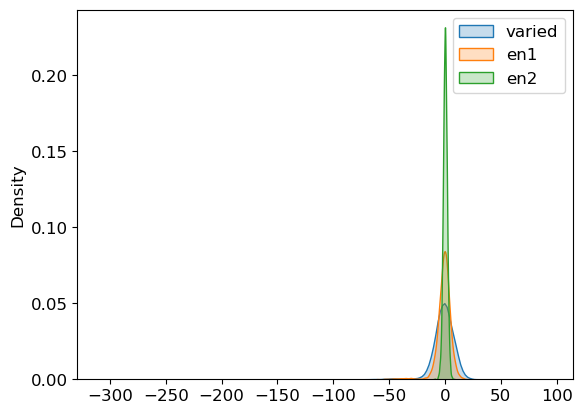

In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning)
labels = ["varied", "en1", "en2"]
for l, t in enumerate([varied_genos, env1_genos, env2_genos]):
    all_vals=[]
    for i,g in enumerate(t):
        all_vals.append(g.flatten())
    all_vals = [x for xs in all_vals for x in xs]
    sns.kdeplot(all_vals,fill=True,label=labels[l])
plt.legend()
    

## GRN trajectories

In [7]:
# Load all GRNs, not just last

root="~/CA_GRN_results/detailed_save/"

# Load GRN

# Parameters
rule = 62
grn_size = 22
num_cells = 22
dev_steps = 22
geneid = 1 #which gene was used to get fitness
seed_ints = ["69904-149796","69904","149796"]
#seed_ints = ['149796-149796',"69904","149796"]
season_lens=[300,100_000,100_000]
folders = ["variable","static","static"]
#folders = ['mut_blast',"static","static"]
rules = [f"{rule}-{rule}", rule, rule]
num_repeats = 15

all_grns = []
for g in range(len(season_lens)):
    grns=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_best_grn.txt")) for i in range(num_repeats)]
    grns = np.array(grns)
    num_grns = int(grns.shape[1]/(grn_size+2)/grn_size)
    grns = grns.reshape(num_repeats,num_grns,grn_size+2,grn_size) #repeats, gens, weights1, weights2
    tmp=np.reshape(grns, (num_repeats,num_grns,(grn_size+2)*grn_size))
    all_grns.append(tmp)
all_grns=np.vstack(all_grns)
all_grns.shape

(45, 9899, 528)

In [44]:
allrules=[22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
vdata=[]
sdata=[]
s2data=[]
vdata_std=[]
sdata_std=[]
s2data_std=[]
for r in allrules:
    print(r)
    rules = [f"{r}-{r}", r, r]
    all_grns = []
    for g in range(len(season_lens)):
        grns=[np.loadtxt(os.path.expanduser(root+f"{folders[g]}/stats_{season_lens[g]}_{rules[g]}_{seed_ints[g]}_{i+1}_best_grn.txt")) for i in range(num_repeats)]
        grns = np.array(grns)
        num_grns = int(grns.shape[1]/(grn_size+2)/grn_size)
        grns = grns.reshape(num_repeats,num_grns,grn_size+2,grn_size) #repeats, gens, weights1, weights2
        tmp=np.reshape(grns, (num_repeats,num_grns,(grn_size+2)*grn_size))
        all_grns.append(tmp)
    all_grns=np.vstack(all_grns)

    # How much they travelled?
    vari_grns = all_grns[:15,:,:]
    starts = vari_grns[:,0,:]
    ends = vari_grns[:,-1,:]
    diffsv = np.abs(ends - starts).mean(axis=1) #average across the genome
    vdata.append(diffsv)

    s1_grns = all_grns[15:30,:,:]
    starts = s1_grns[:,0,:]
    ends = s1_grns[:,-1,:]
    diffss1 = np.abs(ends - starts).mean(axis=1)
    sdata.append(diffss1)

    s2_grns = all_grns[30:,:,:]
    starts = s2_grns[:,0,:]
    ends = s2_grns[:,-1,:]
    diffss2 = np.abs(ends - starts).mean(axis=1)
    s2data.append(diffss2)

    # How different evolved GRNs are from each other?
    vari_stds = all_grns[:15, -1, :].std(axis = 0) #among 15 replicates std, should return 528 values
    #across 15 replicates std distribution across the weights - violinplot
    #depending on the shape just average. but then only 1 values per rule
    s1_stds = all_grns[15:30, -1, :].std(axis = 0)
    s2_stds = all_grns[30:, -1, :].std(axis = 0)
    vdata_std.append(vari_stds)
    sdata_std.append(s1_stds)
    s2data_std.append(s2_stds)


22
126
154
18
122
70
54
94
30
50
62
110
90
150
102


In [45]:
import pickle

data = {
    'v': vdata,
    's': sdata,
    's2': s2data,
    'vstd': vdata_std,
    'sstd': sdata_std,
    's2std': s2data_std
}

# Save to a file
with open('grn_explore_measures.pkl', 'wb') as f:
    pickle.dump(data, f)


In [8]:
with open('grn_explore_measures.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
allrules=[22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

vdata = data["v"]
sdata = data["s"]
s2data = data["s2"]
vdata_std = data["vstd"]
sdata_std = data["sstd"]
s2data_std = data["s2std"]

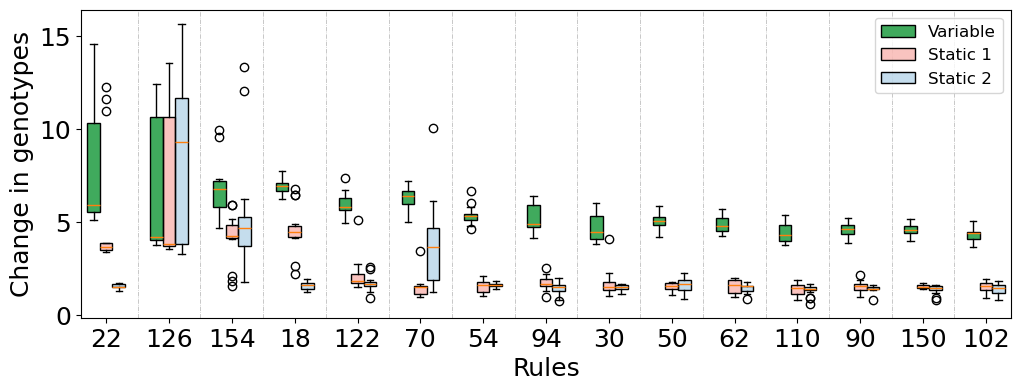

In [16]:
# Create the plot

ixs = np.argsort(np.array(vdata).max(axis=1))[::-1]

vdata = np.array(vdata)
sdata = np.array(sdata)
s2data = np.array(s2data)

plt.figure(figsize=(12, 4))
scale = 2.5

#positions1 = np.arange(1, len(vdata) + 1)*scale - 0.25  # Shift left for the first set
#positions2 = np.arange(1, len(sdata) + 1)*scale + 0.25  # Shift right for the second set

positions1 = np.arange(1, len(vdata) + 1) * scale - 0.5  # Shift left
positions2 = np.arange(1, len(sdata) + 1) * scale  # Centered
positions3 = np.arange(1, len(s2data) + 1) * scale + 0.5  # Shift right

cmaps=["Greens", "Reds", "Blues"]
x=160

box1=plt.boxplot(vdata[ixs].T, positions=positions1, patch_artist=True)
for patch in box1['boxes']:
    color_map = plt.get_cmap(cmaps[0])
    patch.set_facecolor(color_map(x))
box2=plt.boxplot(sdata[ixs].T, positions=positions2, patch_artist=True)
for patch in box2['boxes']:
    color_map = plt.get_cmap(cmaps[1])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

box3=plt.boxplot(s2data[ixs].T, positions=positions3, patch_artist=True)
for patch in box3['boxes']:
    color_map = plt.get_cmap(cmaps[2])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

N = 14
for i in range(N):
    plt.axvline(positions3[i] + 0.75, linestyle="-.", alpha=0.3, c="black",lw=0.5)

plt.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]], ["Variable", "Static 1", "Static 2"], loc="upper right",prop={'size': 12})
plt.xticks(ticks=np.arange(1, len(vdata) + 1)*scale, labels=allrules)
plt.ylabel("Change in genotypes", fontsize=18)
plt.xlabel("Rules", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

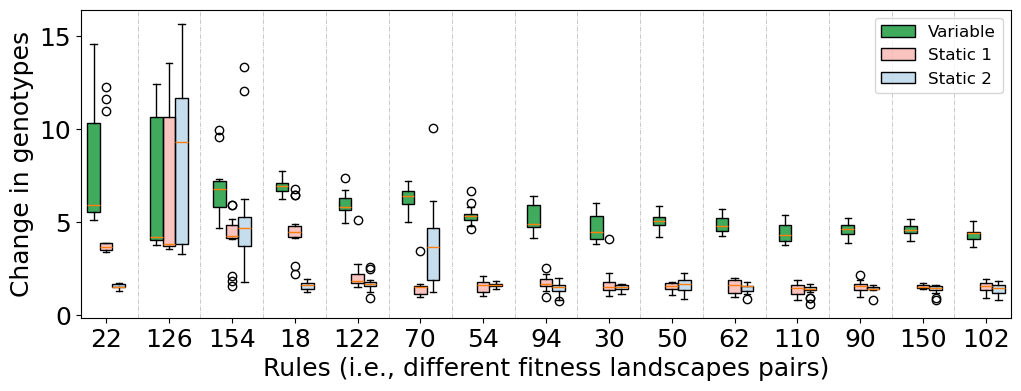

In [33]:
# Create the plot

ixs = np.argsort(np.array(vdata).max(axis=1))[::-1]

vdata = np.array(vdata)
sdata = np.array(sdata)
s2data = np.array(s2data)

fig, ax1 = plt.subplots(figsize=(12, 4))
scale = 2.5

#positions1 = np.arange(1, len(vdata) + 1)*scale - 0.25  # Shift left for the first set
#positions2 = np.arange(1, len(sdata) + 1)*scale + 0.25  # Shift right for the second set

positions1 = np.arange(1, len(vdata) + 1) * scale - 0.5  # Shift left
positions2 = np.arange(1, len(sdata) + 1) * scale  # Centered
positions3 = np.arange(1, len(s2data) + 1) * scale + 0.5  # Shift right

cmaps=["Greens", "Reds", "Blues"]
x=160

box1=ax1.boxplot(vdata[ixs].T, positions=positions1, patch_artist=True)
for patch in box1['boxes']:
    color_map = plt.get_cmap(cmaps[0])
    patch.set_facecolor(color_map(x))
box2=ax1.boxplot(sdata[ixs].T, positions=positions2, patch_artist=True)
for patch in box2['boxes']:
    color_map = plt.get_cmap(cmaps[1])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

box3=ax1.boxplot(s2data[ixs].T, positions=positions3, patch_artist=True)
for patch in box3['boxes']:
    color_map = plt.get_cmap(cmaps[2])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

N = 14
for i in range(N):
    ax1.axvline(positions3[i] + 0.75, linestyle="-.", alpha=0.3, c="black",lw=0.5)

ax1.set_ylabel("Change in genotypes", fontsize=18)

# ax2 = ax1.twinx()
# ax2.plot(positions1, np.array(vdata_std).mean(axis=1), 'o', color='green', label="Mean std dev", markersize=5)
# ax2.plot(positions2, np.array(sdata_std).mean(axis=1), 's', color='red', label="Mean std dev", markersize=5)
# ax2.plot(positions3, np.array(s2data_std).mean(axis=1), '^', color='blue', label="Mean std dev", markersize=5)
# ax2.set_ylabel("Mean std dev of variable data", fontsize=14, color='black')
# ax2.tick_params(axis='y', labelsize=14, colors='black')
#ax2.set_ylim(0,10)

plt.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]], ["Variable", "Static 1", "Static 2"], loc="upper right",prop={'size': 12})
plt.xticks(ticks=np.arange(1, len(vdata) + 1)*scale, labels=allrules)
ax1.set_xlabel("Rules (i.e., different fitness landscapes pairs)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


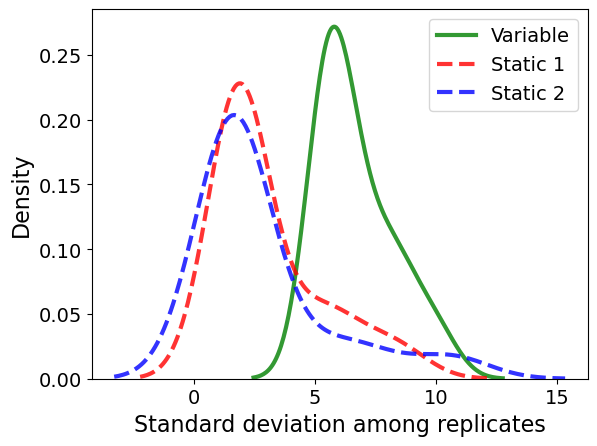

In [25]:
sns.kdeplot(np.array(vdata_std).mean(axis=1), color = "green", alpha = 0.8, label="Variable", lw=3)
sns.kdeplot(np.array(sdata_std).mean(axis=1), color = "red", alpha = 0.8, linestyle="--", label="Static 1", lw=3)
sns.kdeplot(np.array(s2data_std).mean(axis=1), color = "blue", alpha = 0.8, linestyle="--", label="Static 2", lw=3)
plt.legend(fontsize=14)
plt.xlabel("Standard deviation among replicates", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

In [48]:
from scipy.stats import shapiro, levene, rankdata, linregress, kruskal

#data_groups = [np.array(sdata_std).mean(axis=1),np.array(s2data_std).mean(axis=1)]
data_groups = [vdata.flatten(),s2data.flatten()]

print("Shapiro-Wilk Test for Normality:")
for i, group in enumerate(data_groups, start=1):
    stat, p = shapiro(group)
    print(f"Group {i}: W={stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print(f"  Group {i} follows a normal distribution (p > 0.05).")
    else:
        print(f"  Group {i} does not follow a normal distribution (p ≤ 0.05).")

print("\nLevene's Test for Homogeneity of Variances:")
stat, p = levene(*data_groups)
print(f"Levene's statistic={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Variances are homogeneous (p > 0.05).")
else:
    print("Variances are not homogeneous (p ≤ 0.05).")

Shapiro-Wilk Test for Normality:
Group 1: W=0.769, p=0.000
  Group 1 does not follow a normal distribution (p ≤ 0.05).
Group 2: W=0.493, p=0.000
  Group 2 does not follow a normal distribution (p ≤ 0.05).

Levene's Test for Homogeneity of Variances:
Levene's statistic=0.341, p=0.560
Variances are homogeneous (p > 0.05).


In [49]:
stat, p = kruskal(*data_groups) #0.0002, 0.00045
p

6.2545692381762046e-55

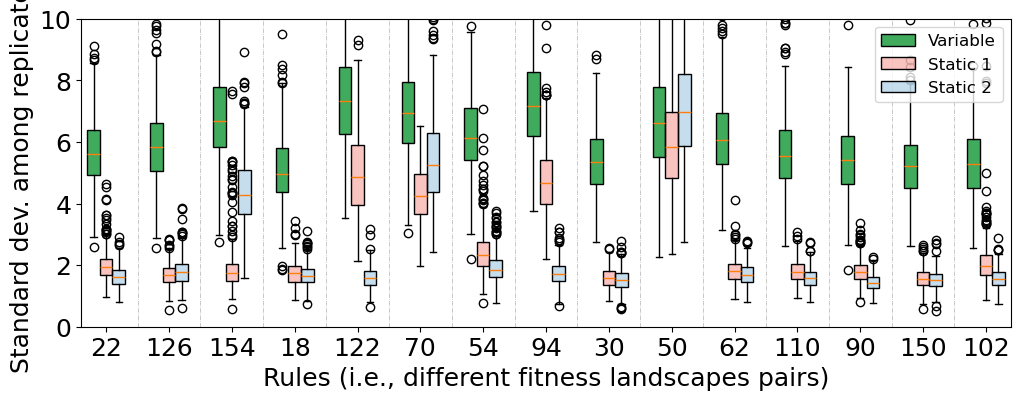

In [53]:
# Create the plot
plt.figure(figsize=(12, 4))
scale = 2.5

#positions1 = np.arange(1, len(vdata) + 1)*scale - 0.25  # Shift left for the first set
#positions2 = np.arange(1, len(sdata) + 1)*scale + 0.25  # Shift right for the second set

positions1 = np.arange(1, len(vdata_std) + 1) * scale - 0.5  # Shift left
positions2 = np.arange(1, len(sdata_std) + 1) * scale  # Centered
positions3 = np.arange(1, len(s2data_std) + 1) * scale + 0.5  # Shift right

cmaps=["Greens", "Reds", "Blues"]
x=160

box1=plt.boxplot(vdata_std, positions=positions1, patch_artist=True)
for patch in box1['boxes']:
    color_map = plt.get_cmap(cmaps[0])
    patch.set_facecolor(color_map(x))
box2=plt.boxplot(sdata_std, positions=positions2, patch_artist=True)
for patch in box2['boxes']:
    color_map = plt.get_cmap(cmaps[1])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

box3=plt.boxplot(s2data_std, positions=positions3, patch_artist=True)
for patch in box3['boxes']:
    color_map = plt.get_cmap(cmaps[2])
    rgba = color_map(x)
    patch.set_facecolor((rgba[0], rgba[1], rgba[2], 0.3))

N = 14
for i in range(N):
    plt.axvline(positions3[i] + 0.75, linestyle="-.", alpha=0.3, c="black",lw=0.5)

plt.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]], ["Variable", "Static 1", "Static 2"], loc="upper right",prop={'size': 12})
plt.xticks(ticks=np.arange(1, len(vdata_std) + 1)*scale, labels=allrules)
plt.ylabel("Standard dev. among replicates", fontsize=18)
plt.xlabel("Rules (i.e., different fitness landscapes pairs)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,10)
plt.show()

In [7]:
#Robustness calculation

last_grn = all_grns[:,-1,:]
nclones = 1000
noise_scaling = 0.063

robs=[]
for j in range(3):
    rob = []
    for i in range(num_repeats):
        candidate = last_grn[i+j*num_repeats,:]
        candidate = np.reshape(candidate, ((grn_size+2),grn_size))
        clones = np.tile(candidate, (nclones, 1, 1))
        noise = np.random.randn(*clones.shape) * noise_scaling
        clones += noise
        clones[0] = candidate
        target1, phenos1, fitnesses1 = helper.get_pop_TPF(
            clones, len(clones), num_cells, grn_size, dev_steps, geneid, rule, 69904, 69904)
        rob.append(fitnesses1[0] - sum(fitnesses1)/len(fitnesses1))
    robs.append(rob)
    

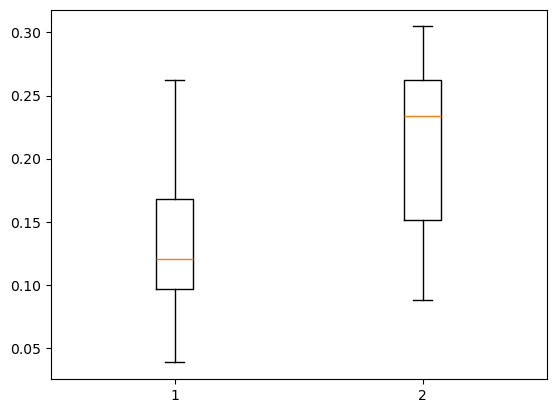

In [8]:
plt.boxplot(robs[:2])
plt.show()

In [39]:
#Difference between current gen and last gen in same environment previously

florp = np.arange(0,9899)
season_len = 300
n_seasons = int(np.floor(florp.shape[0]/season_len))
chunked_gens = np.array([florp[i*season_len:(i+1)*season_len] for i in range(n_seasons)])
assert chunked_gens.size == season_len * n_seasons #safety check
chunked_season1, chunked_season2 = chunked_gens[0::2], chunked_gens[1::2]
#season_end_locs1 = chunked_season1[:-1,-1].repeat(300, axis = 0).reshape(15,300) #last gen each season, reshaped for numpy magic to work
season_end_locs1 = np.array([299]).repeat(300*15).reshape(15,300)
season_locs1 = chunked_season1[1:,:] #seasons past the first
#season_end_locs2 = chunked_season2[:-1,-1].repeat(300, axis = 0).reshape(15,300) #last gen each season, reshaped for numpy magic to work
season_end_locs2 = np.array([599]).repeat(300*15).reshape(15,300)
season_locs2 = chunked_season2[1:,:] #seasons past the first

curr_grns = all_grns[:num_repeats,:,:]

season_end_grns = curr_grns[:,season_end_locs1,:]
season_grns = curr_grns[:,season_locs1,:]
result1 = np.abs(season_end_grns - season_grns) #season ends - next season generations
result1 = result1.reshape((num_repeats,15*300,528)) #flatten generations

season_end_grns = curr_grns[:,season_end_locs2,:]
season_grns = curr_grns[:,season_locs2,:]
result2 = np.abs(season_end_grns - season_grns) #season ends - next season generations
result2 = result2.reshape((num_repeats,15*300,528)) #flatten generations


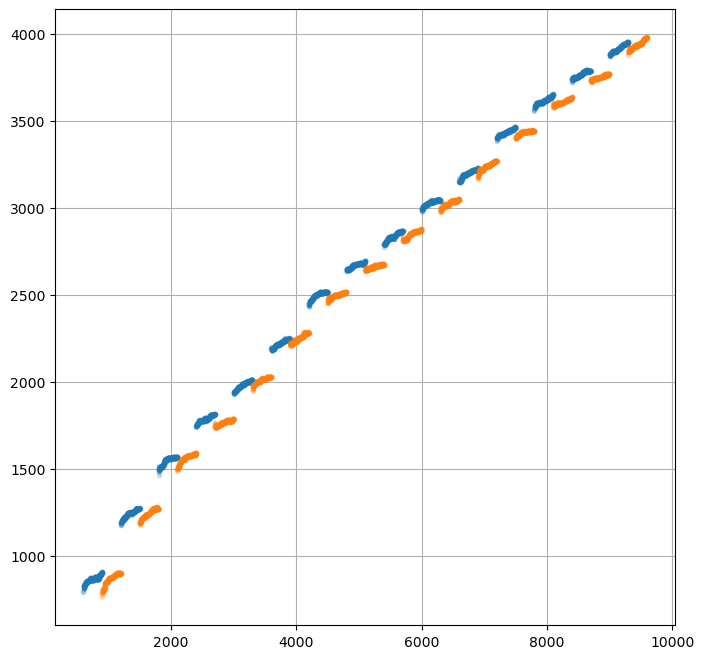

In [40]:
fig = plt.figure(figsize=(8,8))
x_vals = chunked_season1.flatten()[300:]
plt.plot(x_vals,result1.sum(axis=2).mean(axis=0),".",alpha=0.2)
x_vals = chunked_season2.flatten()[300:]
plt.plot(x_vals,result2.sum(axis=2).mean(axis=0),".",alpha=0.2)
#plt.xticks(x_vals[::100])
plt.grid()
plt.show()

In [41]:
#Difference between currect genotype and genotype at the end of last season, regardless of env

ends = florp[::300]
ends = ends -1
season_end_locs = ends[2:-1].repeat(300, axis = 0)#.reshape(15,300)
season_locs = florp[600:9600]

curr_grns = all_grns[:num_repeats,:,:]

season_end_grns = curr_grns[:,season_end_locs,:]
season_grns = curr_grns[:,season_locs,:]
result3 = np.abs(season_end_grns - season_grns) #season ends - next season generations
#result #= result.reshape((15,15*300,528)) #flatten generations

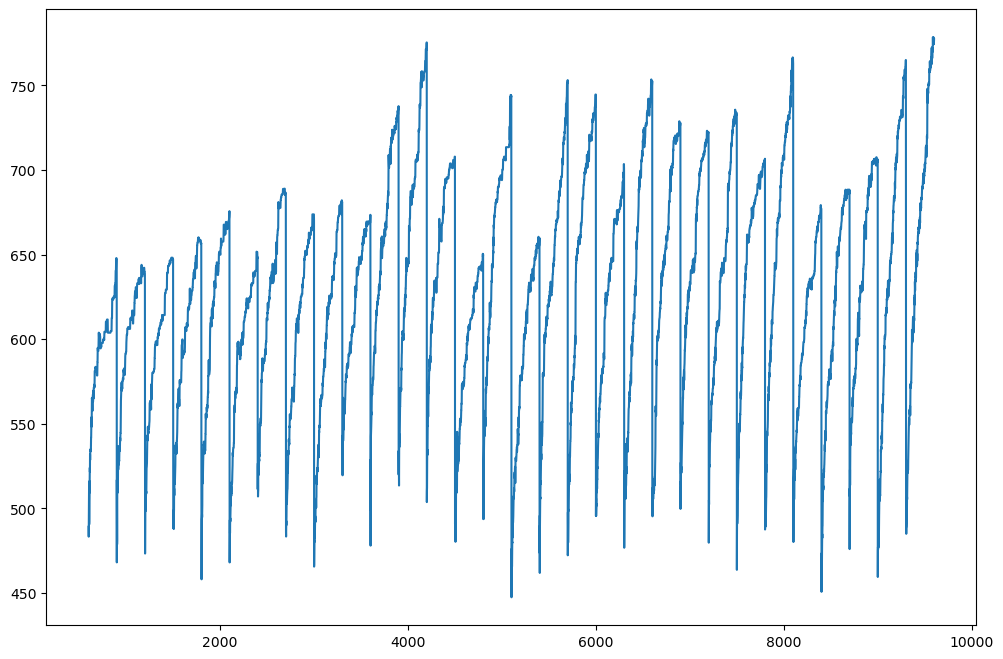

In [42]:
fig = plt.figure(figsize=(12,8))
x_vals = season_locs
plt.plot(x_vals,result3.sum(axis=2).mean(axis=0))

In [43]:
temp_chunks = chunked_season1[1:]-600
temp_chunks.flatten()

array([   0,    1,    2, ..., 8697, 8698, 8699])

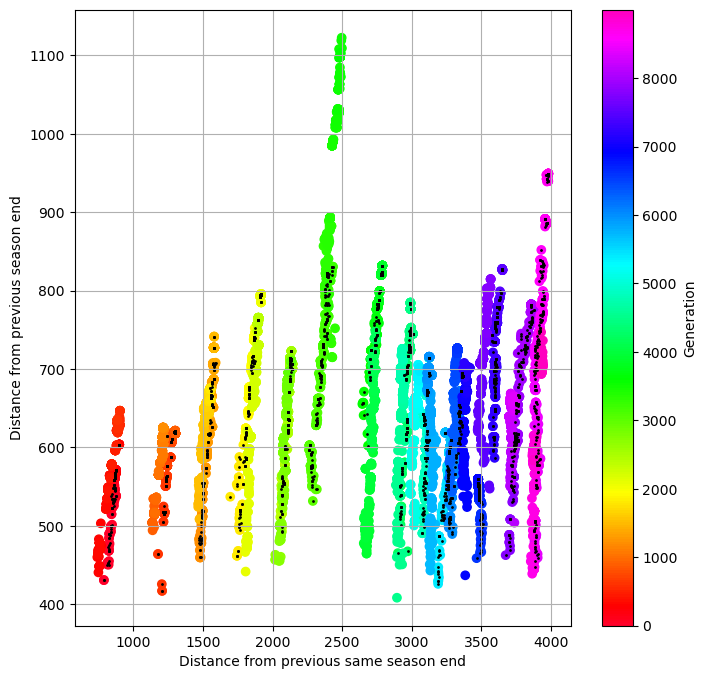

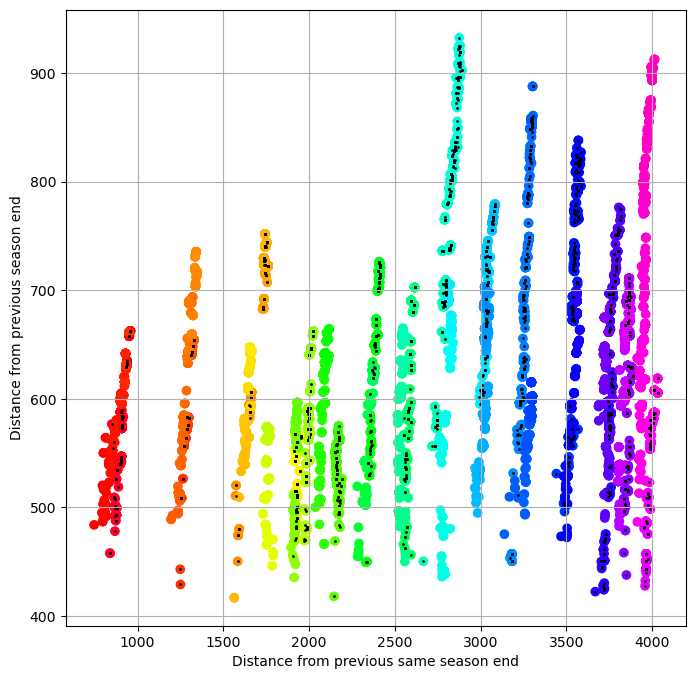

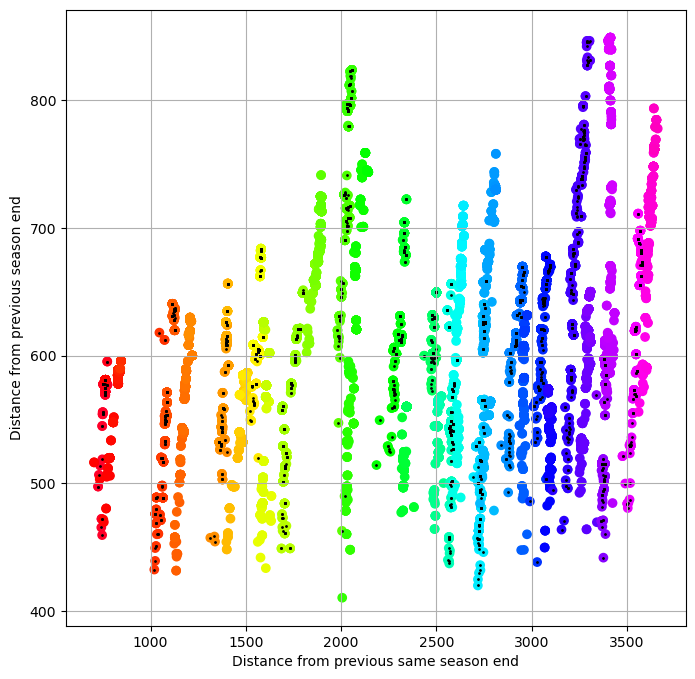

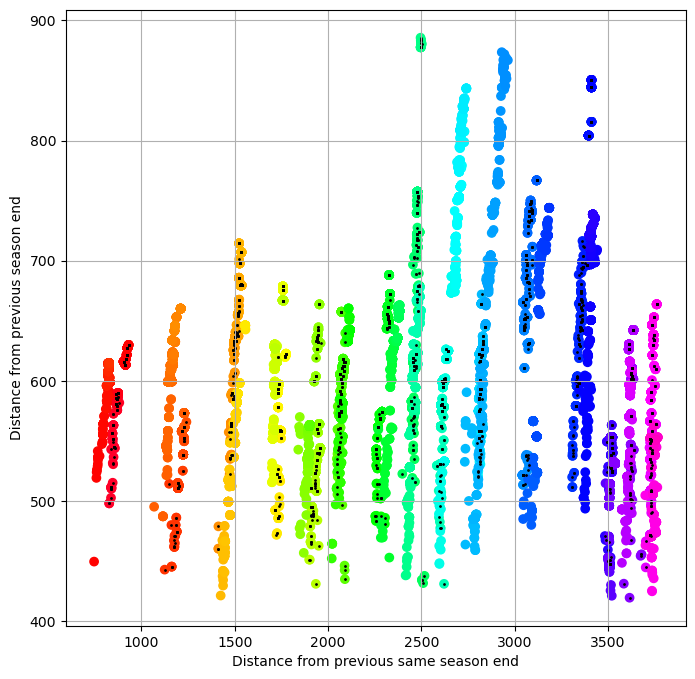

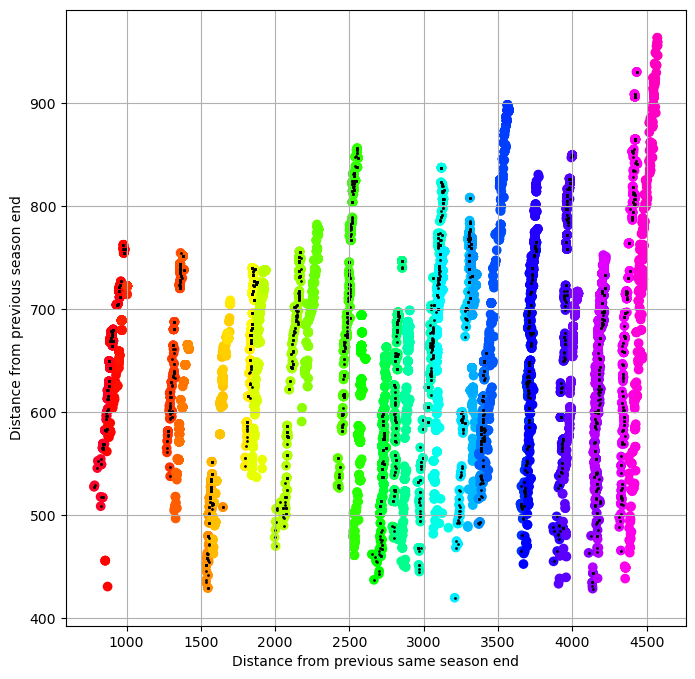

In [44]:
for r in range(num_repeats):
    arr1 = result1.sum(axis=2)[r].reshape((15,300))
    arr2 = result2.sum(axis=2)[r].reshape((15,300))
    interleaved = np.empty((arr1.shape[0] + arr2.shape[0], arr1.shape[1]), dtype=arr1.dtype)
    # Fill the empty array by alternating rows from arr1 and arr2
    interleaved[0::2] = arr1  # Place arr1 rows at even indices
    interleaved[1::2] = arr2  # Place arr2 rows at odd indices

    prev_change = result3.sum(axis=2)[r]

    fig = plt.figure(figsize=(8,8))
    colors = np.arange(len(prev_change))
    plt.scatter(interleaved.flatten(),prev_change,c=colors, cmap='gist_rainbow')
    if r == 0:
        plt.colorbar(label='Generation')
    plt.scatter(interleaved.flatten()[temp_chunks.flatten()],prev_change[temp_chunks.flatten()],c="black", s=1)
    plt.grid()
    plt.ylabel("Distance from previous season end")
    plt.xlabel("Distance from previous same season end")
    #plt.axis("equal")
    #plt.xlim(0,1600)
    #plt.ylim(0,1600)
    #plt.xlim(0,1000)
    #plt.ylim(0,1000)
    plt.show()

(45, 9898, 528)
(45, 9898) 15 9899
(3, 15, 9898)


Text(0.5, 0, 'Generations')

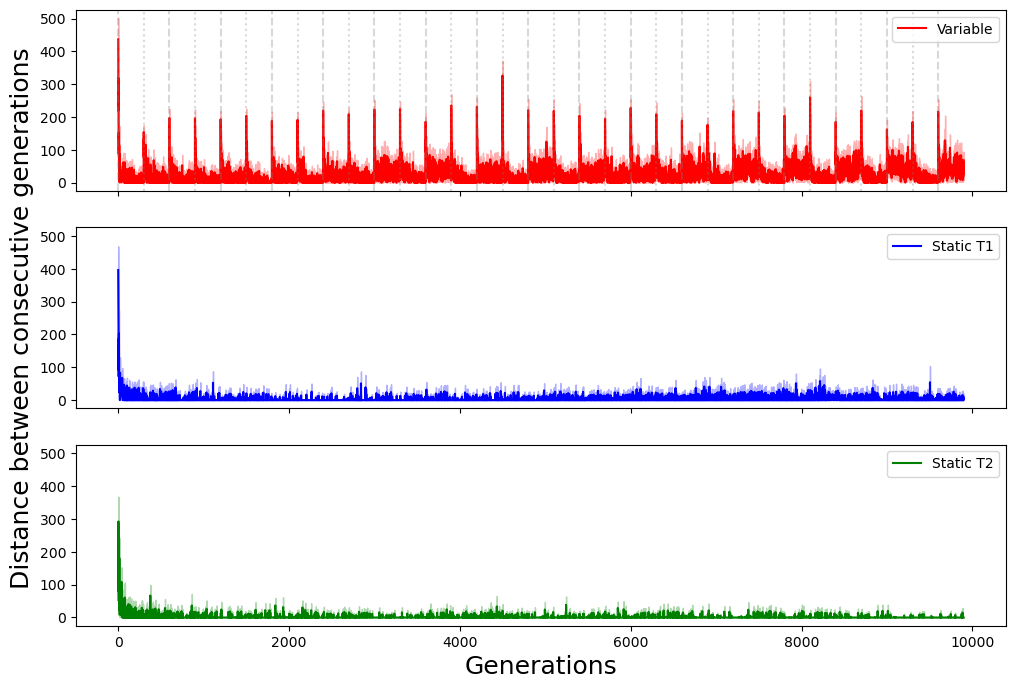

In [5]:
#Difference between consequtive generations
diff = np.abs(all_grns[:,1:] - all_grns[:,:-1])
print(diff.shape)
diff=np.sum(diff,axis=2) #total difference across weights
print(diff.shape, num_repeats,num_grns)
diff = np.reshape(diff, (3,num_repeats,num_grns-1))
print(diff.shape)

fig, ax = plt.subplots(figsize=(12,8), ncols=1, nrows=3, sharex=True, sharey=True)
cs=["red","blue","green"]
labels=["Variable", "Static T1", "Static T2", ]

for i in range(3):
    mean1 = np.mean(diff[i], axis=0) #average across replicated
    stderr1 = np.std(diff[i], axis=0) / np.sqrt(diff[i].shape[0])
    
    ax[i].plot(mean1,color=cs[i],label=labels[i])
    ax[i].fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, color=cs[i], alpha=0.3)
    ax[i].legend()

for j in range(0, len(mean1), season_lens[0]):
    if j % (season_lens[0] * 2) == 0:
        ax[0].axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax[0].axvline(j, linestyle=":", color="gray", alpha=0.3)
    
ax[1].set_ylabel("Distance between consecutive generations",fontsize=18)
plt.xlabel("Generations",fontsize=18)
#plt.savefig("figs/delta_gens.png")

In [6]:
#Difference from the first generation
diff = np.abs(all_grns[:,0,np.newaxis] - all_grns[:,:-1])
print(diff.shape)
diff=np.sum(diff,axis=2) #total difference across weights
print(diff.shape, num_repeats,num_grns)
diff = np.reshape(diff, (3,num_repeats,num_grns-1))
print(diff.shape)

(45, 9898, 528)
(45, 9898) 15 9899
(3, 15, 9898)


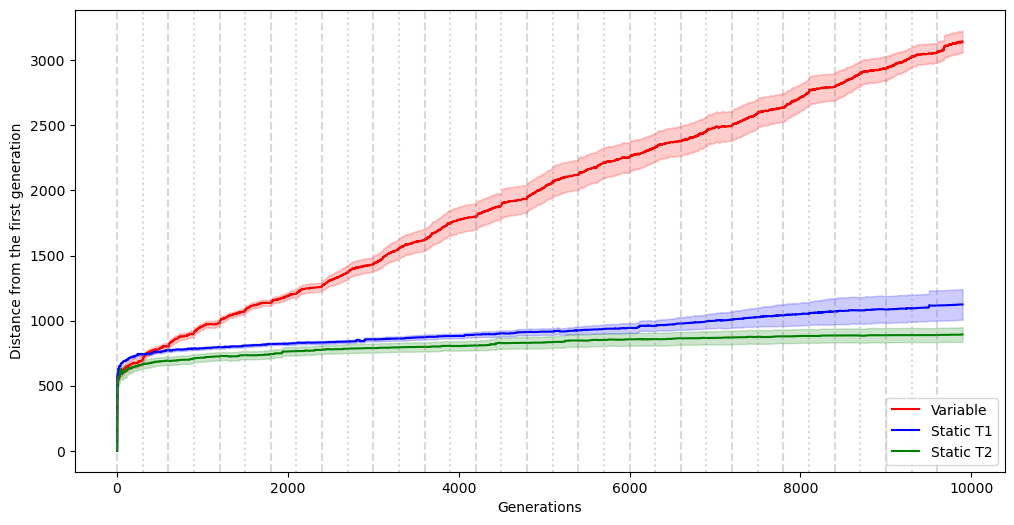

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
for i in range(3):
    mean1 = np.mean(diff[i], axis=0)
    stderr1 = np.std(diff[i], axis=0) / np.sqrt(diff[i].shape[0])
    
    plt.plot(mean1,color=cs[i],label=labels[i])
    plt.fill_between(range(len(mean1)), mean1 - stderr1, mean1 + stderr1, color=cs[i], alpha=0.2)

for j in range(0, len(mean1), season_lens[0]):
    if j % (season_lens[0] * 2) == 0:
        ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
    else:
        ax.axvline(j, linestyle=":", color="gray", alpha=0.3)

plt.ylabel("Distance from the first generation")
plt.xlabel("Generations")
plt.legend()
#plt.savefig("figs/delta_first.png")

In [8]:
num_repeats

15

In [19]:
num_generations=50
num_repeats=15
grn_size=22
check_freq = 150
test=np.array(list(range(9899)))
first_gen_list = test[check_freq-1::check_freq]
#gens_to_get = [first_gen_list[i] for i in range(len(first_gen_list)) if i % 4 in (2, 3)]
gens_to_get = first_gen_list.copy()
print(gens_to_get)
#temp_space=all_grns[:,check_freq-1::check_freq,:] #get spec generations
if num_repeats == 5:
    temp_space=all_grns[:5,np.array(gens_to_get),:] #get spec generations
else: 
    temp_space=all_grns[:,np.array(gens_to_get),:]
space=np.reshape(temp_space, (temp_space.shape[0]*temp_space.shape[1],(grn_size*(grn_size+2)))) #put together repeats and generations
space.shape

[ 149  299  449  599  749  899 1049 1199 1349 1499 1649 1799 1949 2099
 2249 2399 2549 2699 2849 2999 3149 3299 3449 3599 3749 3899 4049 4199
 4349 4499 4649 4799 4949 5099 5249 5399 5549 5699 5849 5999 6149 6299
 6449 6599 6749 6899 7049 7199 7349 7499 7649 7799 7949 8099 8249 8399
 8549 8699 8849 8999 9149 9299 9449 9599 9749]


(2925, 528)

In [25]:
df = pd.DataFrame(space)

# Perform MDS transformation
mds = MDS(n_components=1, random_state=42)
mds_result = mds.fit_transform(df)
y=mds_result[:]
x=np.arange(temp_space.shape[1])

if num_repeats == 5:
    reps = [y[i*num_repeats*temp_space.shape[1]:(i+1)*num_repeats*temp_space.shape[1]].reshape(num_repeats,temp_space.shape[1]) for i in range(1)]
else:
    reps = [y[i*num_repeats*temp_space.shape[1]:(i+1)*num_repeats*temp_space.shape[1]].reshape(num_repeats,temp_space.shape[1]) for i in range(3)]


/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [27]:
#df.to_csv(f'variable_{rule}.csv', index=False)
df_vari = pd.read_csv(f'variable_62.csv')
df_mut = pd.read_csv(f'variable_54.csv')

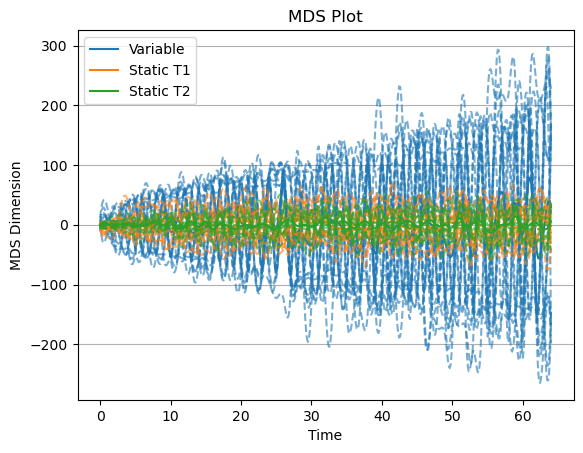

In [28]:
# Create a figure and axis
fig, ax = plt.subplots()

spline_res = 500

for i,rep in enumerate(reps):
    for run in rep:
        #plt.plot(x,val,c=color)
        spline = interp1d(np.arange(run.shape[0]), run, kind='cubic')
        fine_xs = np.linspace(x.min(), x.max(), spline_res)
        plt.plot(fine_xs, spline(fine_xs), "--", c=f"C{i}",alpha=0.6)

    m_rep = np.mean(rep, axis=0)
    spline = interp1d(np.arange(m_rep.shape[0]), m_rep, kind='cubic')
    fine_xs = np.linspace(x.min(), x.max(), spline_res)
    plt.plot(fine_xs, spline(fine_xs), c=f"C{i}",label=labels[i])

# Add axis labels and title
plt.xlabel('Time')
plt.ylabel('MDS Dimension')
plt.legend()
plt.title('MDS Plot')
plt.grid(axis="y")

# Show plot
plt.show()

In [29]:
df_vari

,0,1,2,3,4,5,6,7,8,9,...,518,519,520,521,522,523,524,525,526,527
0,1.153773,-4.354931,2.075291,2.259444,0.646627,-0.597488,-0.624171,0.821254,-2.053246,-0.638726,...,-0.436098,1.279253,2.627572,-1.945042,-1.184774,-0.725886,-1.727632,0.313407,-1.656898,0.390650
1,1.720243,-3.807626,3.005148,0.321774,-0.499443,1.925110,0.900437,0.896554,-1.674896,-0.552112,...,0.008892,2.202571,1.901702,-1.734994,0.288091,-1.566303,-3.022973,0.347431,-2.968342,-0.214366
2,1.544574,-3.088260,2.863422,0.568415,-1.174979,1.131412,0.876271,0.306906,0.070327,-0.552112,...,-1.681618,2.372771,3.103599,-0.629126,0.345207,-2.652435,-1.832902,0.897668,-1.450096,-1.207425
3,1.657498,-4.904236,2.175353,0.075373,-1.440517,1.131412,1.402561,-0.126990,-1.481391,-0.306742,...,-0.909756,1.228604,2.385909,-0.456474,-0.709677,-2.372041,-1.362046,1.547292,-1.008628,0.073815
4,0.672585,-4.580690,1.167707,0.075373,-2.261908,0.499955,2.097515,0.012803,0.533039,-1.825611,...,-0.511975,0.723288,2.352648,0.305979,-0.708201,-2.825709,-0.825756,-0.138892,-1.197353,0.459554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,-2.571845,-2.440778,-1.564039,2.102357,0.078697,0.054198,0.548896,-0.905536,-1.542090,0.471058,...,-2.137295,-0.599447,2.090233,-0.869083,1.921650,0.599126,-2.942063,-0.372745,1.031892,-3.423629
2921,-2.571845,-2.440778,-1.564039,2.102357,-0.390246,0.113323,-0.015915,-0.905536,-1.542090,0.471058,...,-1.428519,-0.599447,2.108068,-0.869083,1.921650,0.599126,-2.942063,-0.372745,1.031892,-2.672986
2922,-2.493412,-2.503240,-1.863680,2.164148,0.066154,0.199271,0.882032,-0.307740,-3.281510,1.185012,...,-1.305416,0.023129,1.747799,-0.693192,1.466824,0.587264,-2.122185,-1.446528,1.327495,-4.098168
2923,-2.493412,-2.503240,-1.863680,2.164148,0.066154,0.199271,0.882032,-0.307740,-3.281510,1.185012,...,-1.305416,0.023129,1.747799,-0.693192,1.466824,0.587264,-2.122185,-1.446528,1.327495,-4.098168


In [30]:
#df = pd.DataFrame(space)
df = pd.concat([df_vari, df_mut], axis=0, ignore_index=True)

# Perform MDS transformation
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(df)
y1=mds_result[:,0]
y2=mds_result[:,1]
#y3=mds_result[:,2]
x=np.arange(temp_space.shape[1])

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [2]:
import pickle
#pickle.dump([y1,y2], open("2d_126.p", "wb" ) )

In [41]:
rules

['62-62', 62, 62]

In [3]:
y1,y2 = pickle.load(open("anal_saved_results/2d_18.p", "rb"))

In [23]:
def flower_plot(rule):
    y1,y2 = pickle.load(open(f"anal_saved_results/2d_{rule}.p", "rb"))
    fig, ax = plt.subplots(figsize=(8,8))

    #s1=np.reshape(y1[:len(df_vari)],(3,15,len(gens_to_get)))
    #s2=np.reshape(y2[:len(df_vari)],(3,15,len(gens_to_get)))
    s1=np.reshape(y1,(3,15,len(gens_to_get)))
    s2=np.reshape(y2,(3,15,len(gens_to_get)))

    cmaps=["Greens", "Reds", "Blues"]
    cs=["green","red","blue"]
    labels=["Variable","Static 1", "Static 2"]

    sel_runs=[] #3,5,12,13,14 not too much going around
    rep_ids = list(range(15))

    for i in range(3):
        for j in rep_ids:
            #if i== 2 and j==9:
                #print("nope")
                #pass
            #else:
            color_map = plt.get_cmap(cmaps[i])
            num_points = len(s2[i][j])
            for p in range(num_points):
                # Calculate color based on index
                color = color_map(p / (num_points - 1)+0.3)  # Normalize index to [0, 1]
                #print(color)
                # Plot the point with adjusted color
                if p == int(num_points/2) and j==0:
                    plt.scatter(s1[i][j][p], s2[i][j][p], color=color,label=labels[i])# edgecolor='black')
                else:
                    plt.scatter(s1[i][j][p], s2[i][j][p], color=color)# edgecolor='black')
            #plt.scatter(s1[i][j][-1], s2[i][j][-1], color="yellow", marker="^")
            #if i == 0:
                #plt.plot(s1[i][j],s2[i][j],c=cs[i], linestyle='--', marker='o',alpha=0.2,markeredgecolor=cs[i])

    plt.xlabel("MDS dimension 1", fontsize=22)
    plt.ylabel("MDS dimension 2", fontsize=22)
    plt.legend(loc="upper right", prop={'size': 18},handletextpad=0.1)
    plt.tick_params(axis='both', which='major', labelsize=18)
    #plt.axis('off')
    #fig = plt.gcf()
    #fig.patch.set_visible(False)  # Removes figure background
    #plt.gca().patch.set_visible(False)  # Removes axes background
    plt.show()

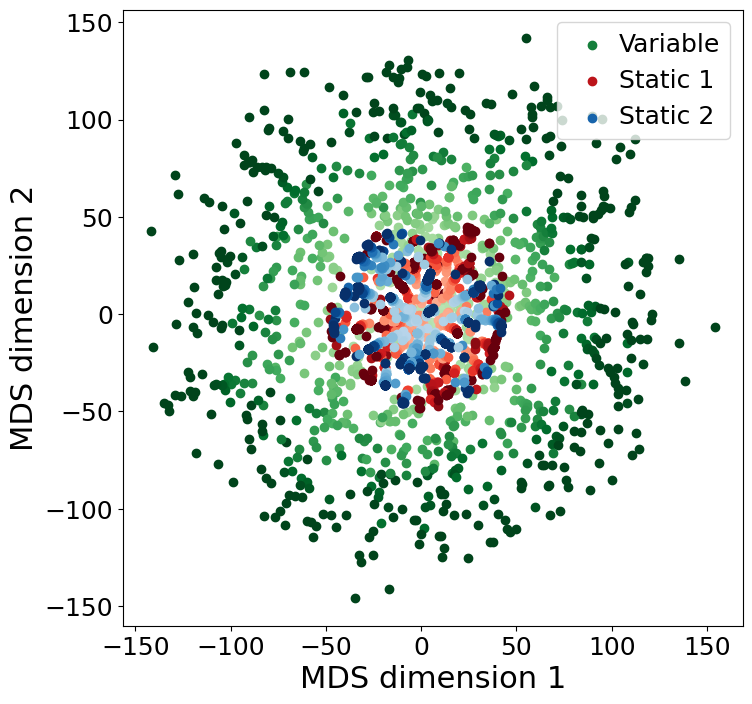

In [24]:
rules = [18]#[22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]
for rule in rules:
    flower_plot(rule)

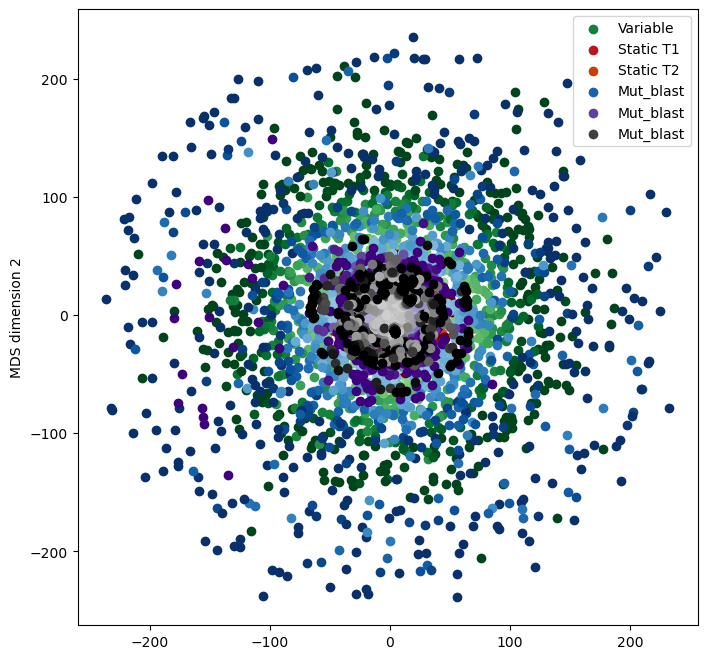

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

s1=np.reshape(y1[:len(df_vari)],(3,15,len(gens_to_get)))
s2=np.reshape(y2[:len(df_vari)],(3,15,len(gens_to_get)))

cmaps=["Greens", "Reds", "Oranges"]
cs=["green","red","orange"]
labels=["Variable","Static T1", "Static T2"]

sel_runs=[] #3,5,12,13,14 not too much going around
rep_ids = list(range(15))

for i in range(3):
    for j in rep_ids:
        #if i== 2 and j==9:
            #print("nope")
            #pass
        #else:
        color_map = plt.get_cmap(cmaps[i])
        num_points = len(s2[i][j])
        for p in range(num_points):
            # Calculate color based on index
            color = color_map(p / (num_points - 1)+0.3)  # Normalize index to [0, 1]
            #print(color)
            # Plot the point with adjusted color
            if p == int(num_points/2) and j==0:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color,label=labels[i])# edgecolor='black')
            else:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color)# edgecolor='black')
        #plt.scatter(s1[i][j][-1], s2[i][j][-1], color="yellow", marker="^")
        #if i == 0:
            #plt.plot(s1[i][j],s2[i][j],c=cs[i], linestyle='--', marker='o',alpha=0.2,markeredgecolor=cs[i])

s1=np.reshape(y1[len(df_vari):],(3,15,len(gens_to_get)))
s2=np.reshape(y2[len(df_vari):],(3,15,len(gens_to_get)))
rep_ids = list(range(15))
cmaps = ["Blues","Purples","Greys"]
for i in range(3):
    for j in rep_ids:
        color_map = plt.get_cmap(cmaps[i])
        num_points = len(s2[i][j])
        for p in range(num_points):
            # Calculate color based on index
            color = color_map(p / (num_points - 1)+0.3)  # Normalize index to [0, 1]
            #print(color)
            # Plot the point with adjusted color
            if p == int(num_points/2) and j==0:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color,label="Mut_blast")# edgecolor='black')
            else:
                plt.scatter(s1[i][j][p], s2[i][j][p], color=color)# edgecolor='black')
        #plt.plot(s1[j],s2[j],c="blue", linestyle='--', marker='o',alpha=0.2,markeredgecolor=cs[i])

plt.ylabel("MDS dimension 1")
plt.ylabel("MDS dimension 2")
plt.legend()
plt.show()

Text(0, 0.5, 'MDS dimension 2')

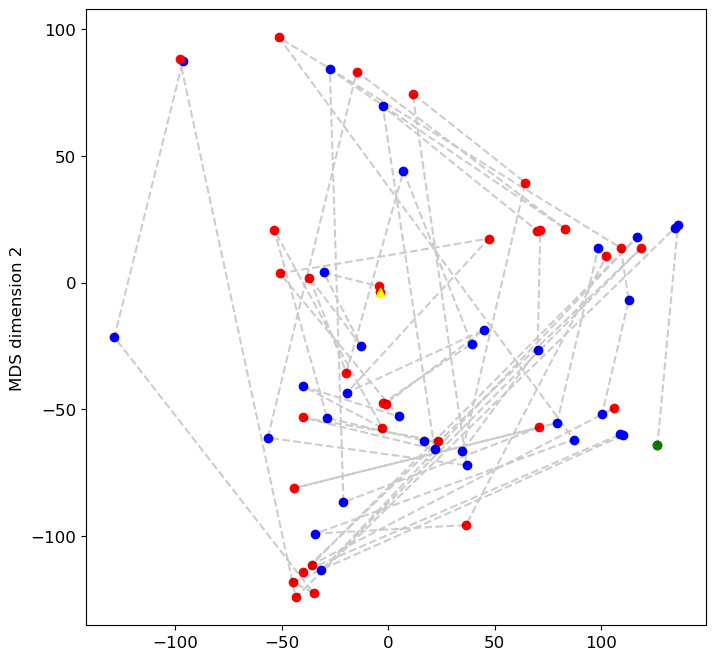

In [58]:
fig, ax = plt.subplots(figsize=(8,8))

s1=np.reshape(y1,(3,num_repeats,temp_space.shape[1]))
s2=np.reshape(y2,(3,num_repeats,temp_space.shape[1]))

cmaps=["Greens", "Reds", "Blues"]
cs=["green","red","blue"]
labels=["Variable","Static T1", "Static T2", ]

sel_runs=[] #3,5,12,13,14 not too much going around

for i in range(1):
    for j in np.arange(4,5):
        color_map = plt.get_cmap(cmaps[i])
        num_points = len(s2[i][j])
        for p in range(num_points):
            # Calculate color based on index
            if p % 4 < 2:
                plt.scatter(s1[i][j][p], s2[i][j][p], color="red",label=labels[i])# edgecolor='black')
            else:
                plt.scatter(s1[i][j][p], s2[i][j][p], color="blue")# edgecolor='black')
        plt.scatter(s1[i][j][-1], s2[i][j][-1], color="green", marker="o")
        plt.scatter(s1[i][j][0], s2[i][j][0], color="yellow", marker="^")
        plt.plot(s1[i][j],s2[i][j],c="black", linestyle='--',alpha=0.2)
plt.ylabel("MDS dimension 1")
plt.ylabel("MDS dimension 2")
#plt.legend()